## 七月在线机器学习实训营三期第三周(Pandas数据处理)考试
#### 考试说明:
- 起止时间：请同学在2018年2月9日至2月11日期间完成，最晚提交时间本周日（2月11日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam3后，进行作答。例如wangwei-exam3
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/3/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>杨志明</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

### Pandas实战题(共七个步骤，每个步骤要求及分数均已标明。总分100分)

1.请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（7.5分）   
请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（7.5分）

***
Done!   
head方法默认值 就是5，所以可以直接head,:)

In [2]:
import pandas as pd
import numpy as np
df_info = pd.read_csv('../data/student-info.csv',sep=';')
df_score = pd.read_csv('../data/student-score.csv',sep = ';')

In [5]:
df_info.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
df_score.head(5)

,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

In [8]:
df = pd.merge(df_info,df_score,left_on='ID',right_on='ID',how='left') #left
df1 = pd.merge(df_info, df_score, on='ID', how='inner')  #inner
df.head(5)

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


3.把"df"所有的列展示出来(5分)

In [9]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [10]:
grouped_df = df[['sex','G1','G2','G3']].groupby('sex').agg('mean')
grouped_df

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

In [11]:
import matplotlib.pyplot as plt 
grouped_df1 = df[['age','G1','G2','G3']].groupby('age').agg('mean')

In [12]:
grouped_df1

,G1,G2,G3
age,,,
15,11.231707,11.365854,11.256098
16,10.942308,11.182692,11.028846
17,10.897959,10.479592,10.275510
18,10.719512,10.134146,9.548780
19,10.250000,9.250000,8.208333
20,13.666667,13.666667,14.000000
21,10.000000,8.000000,7.000000
22,6.000000,8.000000,8.000000


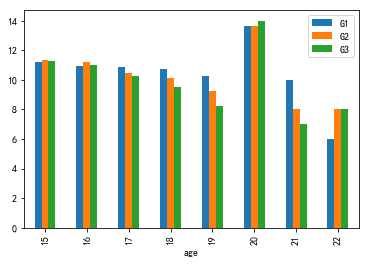

In [13]:
%matplotlib inline
grouped_df1.plot.bar()

6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

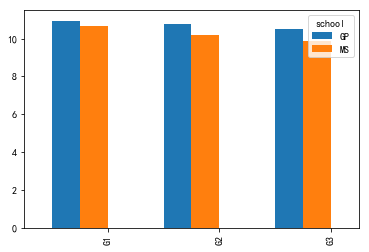

In [14]:
grouped_df2 = df[['school','G1','G2','G3']].groupby('school').agg('mean')
grouped_df2.T.plot.bar(position  = 1)

7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

In [15]:
df.loc[:,'total_socre'] = df.apply(lambda x: x['G1']+x['G2']+x['G3'],axis=1)

In [16]:
df.sort_values(['school','total_socre'],ascending=False).groupby('school').head(10)

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_socre
374,374,MS,F,18,R,LE3,T,4,4,other,...,4,4,1,1,1,0,19,18,19,56
359,359,MS,F,18,U,LE3,T,1,1,at_home,...,3,2,1,1,4,0,18,16,16,50
363,363,MS,F,17,U,LE3,T,4,4,at_home,...,3,4,1,1,1,0,16,15,15,46
391,391,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,3,14,16,16,46
378,378,MS,F,18,U,GT3,T,3,3,other,...,1,3,1,2,1,0,15,15,15,45
376,376,MS,F,20,U,GT3,T,4,2,health,...,4,3,1,1,3,4,15,14,15,44
380,380,MS,M,18,U,GT3,T,4,4,teacher,...,2,4,1,4,2,4,15,14,14,43
351,351,MS,M,17,U,GT3,T,3,3,health,...,5,4,2,3,3,2,13,13,13,39
360,360,MS,F,18,R,LE3,A,1,4,at_home,...,3,4,1,4,5,0,13,13,13,39
366,366,MS,M,18,U,LE3,T,4,4,teacher,...,2,2,2,2,5,0,13,13,13,39


### 本阶段课程意见反馈题(10分送分项，非必答)
- 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。



- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>